In [1]:
from langgraph.graph import StateGraph ,START,END,add_messages
from typing import TypedDict,Annotated,List

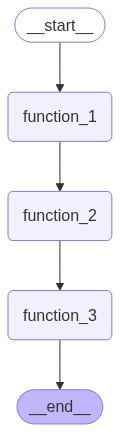

In [2]:
## 1) step:1 -> create a class for state
class State(TypedDict):
    messages:Annotated[list,add_messages]

## step:2-> Add node defination
def function_1(state:State)->str:
    return "This is function 1"

def function_2(state:State)->str:
    return "This is function 2"

def function_3(state:State)->str:
    return "This is function 3"

## step:3 -> build the graph
graph=StateGraph(State)
graph.add_node("function_1",function_1)
graph.add_node("function_2",function_2)
graph.add_node("function_3",function_3)

graph.add_edge(START,"function_1")
graph.add_edge("function_1","function_2")
graph.add_edge("function_2","function_3")

## step:4 ->compiling the graph
graph_builder=graph.compile()

## step:5 ->display the graph
from IPython.display import display, Image
try:
    display(Image(graph_builder.get_graph().draw_mermaid_png()))
except Exception as e:
    print(f"Error displaying graph: {e}")







### Calling LLM in the workflow

In [3]:
from langchain_groq import ChatGroq

from langchain.chat_models import init_chat_model
import os 
from dotenv import load_dotenv
load_dotenv()
llm=ChatGroq(model="llama3-8b-8192")  
llm


ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x00000140F9C8DA90>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x00000140F9DDD810>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

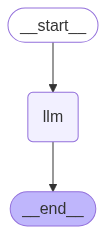

In [ ]:
from langgraph.memo
class state_llm(TypedDict):
    messages: Annotated[List,add_messages]

graph=StateGraph(state_llm)

# step:3 create node defination
def llm_call(state:state_llm)->str:
    messages=state["messages"]
    return {"messages": llm.invoke(messages)}

#   return{"messages":[llm.invoke(state["messages"])]}

graph.add_node("llm",llm_call)
graph.add_edge(START,"llm")
graph.add_edge("llm",END)

graph_builder_llm=graph.compile()

from IPython.display import display, Image
try:
    display(Image(graph_builder_llm.get_graph().draw_mermaid_png()))
except Exception as e:
    print(f"Error displaying graph: {e}")


In [10]:
graph_builder_llm.invoke({"messages":"Hi how are u"})

{'messages': [HumanMessage(content='Hi how are u', additional_kwargs={}, response_metadata={}, id='83844be5-b362-4d6c-aebe-3157c171197a'),
  AIMessage(content="I'm just a language model, I don't have emotions or feelings like humans do, so I don't have a personal state of being. However, I'm functioning properly and ready to assist you with any questions or tasks you may have! How can I help you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 57, 'prompt_tokens': 14, 'total_tokens': 71, 'completion_time': 0.03931297, 'prompt_time': 0.002064595, 'queue_time': 0.268283638, 'total_time': 0.041377565}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8dc6ecaf8e', 'finish_reason': 'stop', 'logprobs': None}, id='run--51822a4e-bbd7-40e9-90f9-4be05ec6ed14-0', usage_metadata={'input_tokens': 14, 'output_tokens': 57, 'total_tokens': 71})]}

In [11]:
config={"configurable":{"thread_id":"1"}}
graph_builder_llm.invoke({"messages":"Hi how are u"},config=config)


{'messages': [HumanMessage(content='Hi how are u', additional_kwargs={}, response_metadata={}, id='76d16dc0-b64b-4382-9c7b-fbda05e01be4'),
  AIMessage(content="I'm just an AI, so I don't have feelings like humans do, but I'm functioning properly and ready to help with any questions or tasks you may have! How about you? How's your day going so far?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 47, 'prompt_tokens': 14, 'total_tokens': 61, 'completion_time': 0.032631549, 'prompt_time': 0.002044876, 'queue_time': 0.267789773, 'total_time': 0.034676425}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8dc6ecaf8e', 'finish_reason': 'stop', 'logprobs': None}, id='run--89aed34d-37b4-4175-90e5-13bb42cc088f-0', usage_metadata={'input_tokens': 14, 'output_tokens': 47, 'total_tokens': 61})]}

In [13]:
graph_builder_llm.invoke({"messages":"Hi how are u bro"},config=config)

{'messages': [HumanMessage(content='Hi how are u bro', additional_kwargs={}, response_metadata={}, id='9f1e70b4-dbdc-402e-b4d5-1d551ce8ac57'),
  AIMessage(content="Hi! I'm just an AI, so I don't have feelings or emotions like humans do, but I'm functioning properly and ready to help with any questions or tasks you have! How about you? How's your day going?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 48, 'prompt_tokens': 15, 'total_tokens': 63, 'completion_time': 0.034761771, 'prompt_time': 0.002301117, 'queue_time': 0.272818022, 'total_time': 0.037062888}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_6d1c2b0784', 'finish_reason': 'stop', 'logprobs': None}, id='run--bcf95818-f693-42e2-9c80-0638c49a4a5e-0', usage_metadata={'input_tokens': 15, 'output_tokens': 48, 'total_tokens': 63})]}